# **traffic-accidents-in-korea-2018**

We will use [traffic accident dataset](https://www.data.go.kr/dataset/3038489/fileData.do) provided by Data.go.kr.

File Name: **도로교통공단_사고유형별_교통사고_통계(2018).zip**

## **List of Files**

**Dataset**: accident_type<br>
*Encoding*: EUC-KR

*   **byMonth.csv** (도로교통공단_사고유형별_월별_교통사고(2018).csv)
*   **byRoadType.csv** (도로교통공단_사고유형별_도로종류별_교통사고(2018).csv)
*   **bySuspectAge.csv** (도로교통공단_사고유형별_가해운전자_연령층별_교통사고(2018).csv)
*   **bySuspectCarType.csv** (도로교통공단_사고유형별_가해운전자_차종별_교통사고(2018).csv)
*   **bySuspectLawViolation.csv** (도로교통공단_사고유형별_가해운전자_법규위반별_교통사고(2018).csv)

Use this code to convert file with encoding **EUC-KR** to **UTF-8**.
```
iconv -f euc-kr -t utf-8 old.csv > new.csv
```

## **Importing Libraries**

In [0]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [119]:
# For Korean support
# Restart runtime if it doesn't work
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

plt.rcParams['font.family'] = ['NanumBarunGothic']
sns.set_style("darkgrid", {"font.sans-serif":['NanumBarunGothic', 'Arial']})

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


## **Setting Directory Path**

In [0]:
DIR_PATH = '/content/drive/My Drive/Colab Notebooks/data/kr-traffic-accidents-2018/accident_type/'

## **Data Analysis**

### **By Month**

In [121]:
byMonth = pd.read_csv(os.path.join(DIR_PATH, 'byMonth.csv'))
print('There are total {0} cases of monthly data \n'.format(byMonth.shape[0]))
byMonth.head()

There are total 203 cases of monthly data 



,사고유형대분류,사고유형,월,발생건수,사망자수,부상자수,중상,경상,부상신고
0,차대사람,횡단중,01월,1667,88,1707,917,720,70
1,차대사람,횡단중,02월,1511,62,1533,760,713,60
2,차대사람,횡단중,03월,1599,76,1629,798,751,80
3,차대사람,횡단중,04월,1544,62,1578,766,750,62
4,차대사람,횡단중,05월,1495,46,1573,739,774,60


기타            36
도로이탈          24
전복            12
길가장자리구역통행중    12
차도통행중         12
횡단중           12
정면충돌          12
보도통행중         12
공작물충돌         12
후진중충돌         12
측면충돌          12
전도            12
추돌            12
주/정차차량 충돌      8
철길건널목          3
Name: 사고유형, dtype: int64


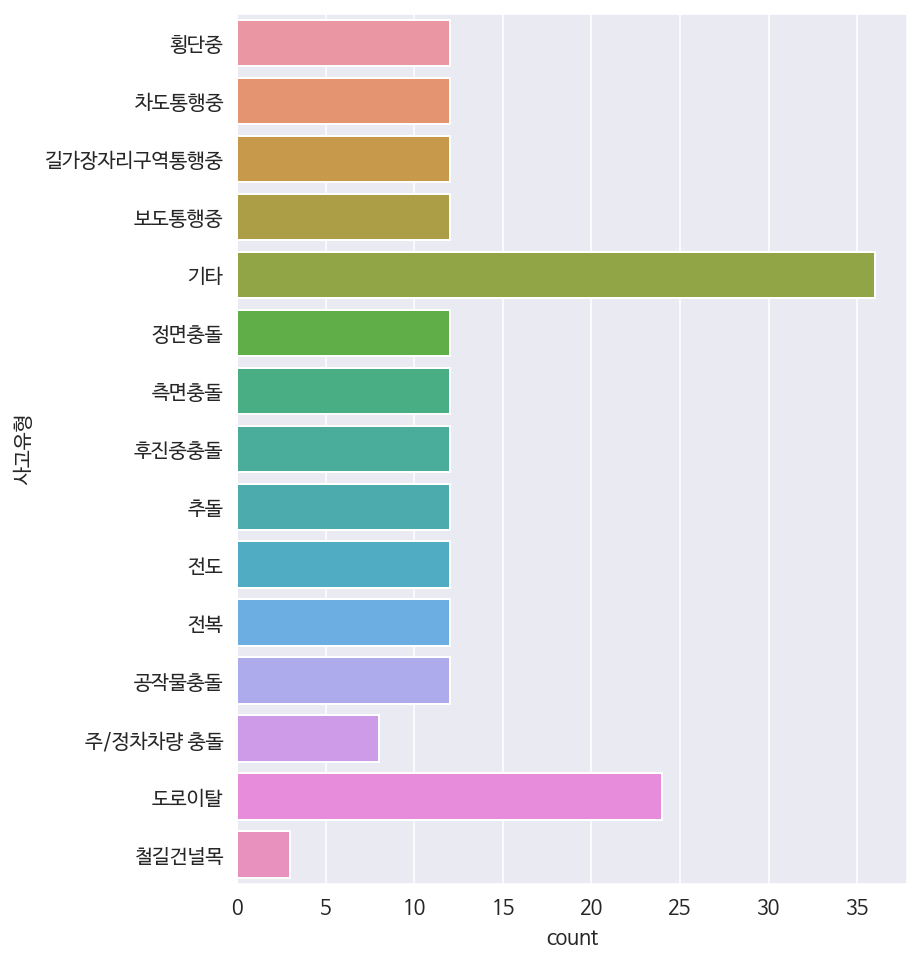

In [122]:
# Types of accident
plt.figure(figsize=(6, 8))
print(byMonth['사고유형'].value_counts())
sns.countplot(y='사고유형', data=byMonth)

We can see that there are 15 main types of accident in this dataset.

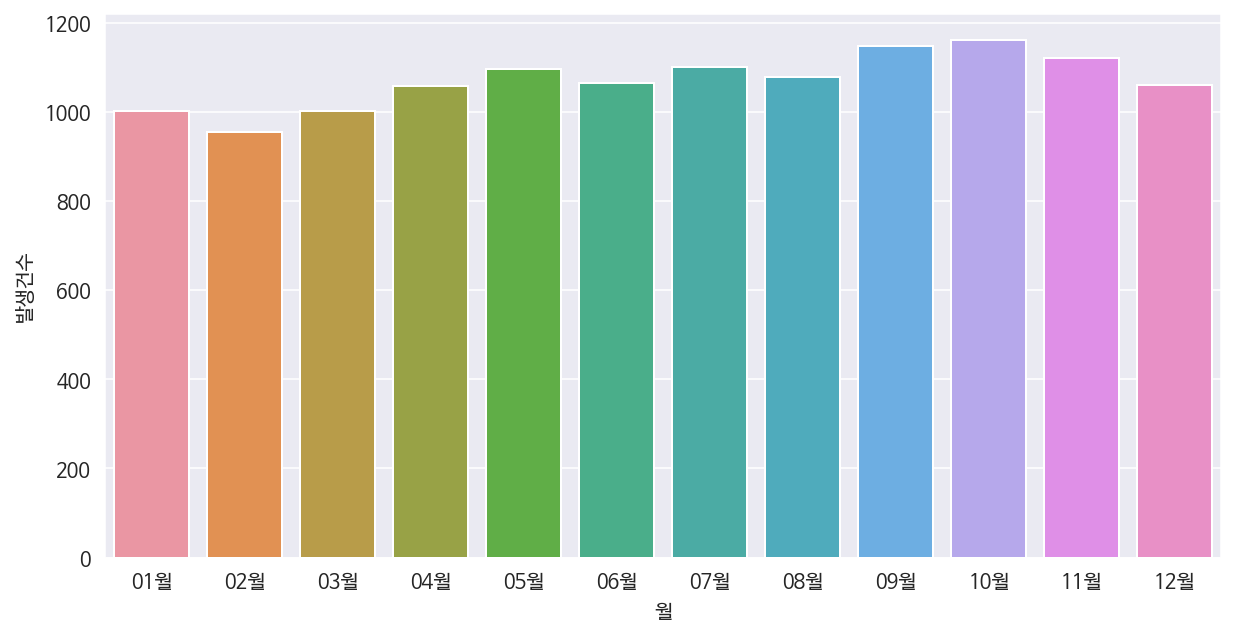

In [147]:
plt.figure(figsize=(10, 5))
sns.barplot(data=byMonth, x='월', y='발생건수', ci=None)

There were the most traffic accidents in October in the year 2018.

In [0]:
# Tag value on bars
def show_values_on_bars(axs, h_v="v", space=0.4, modh=0):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(modh)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

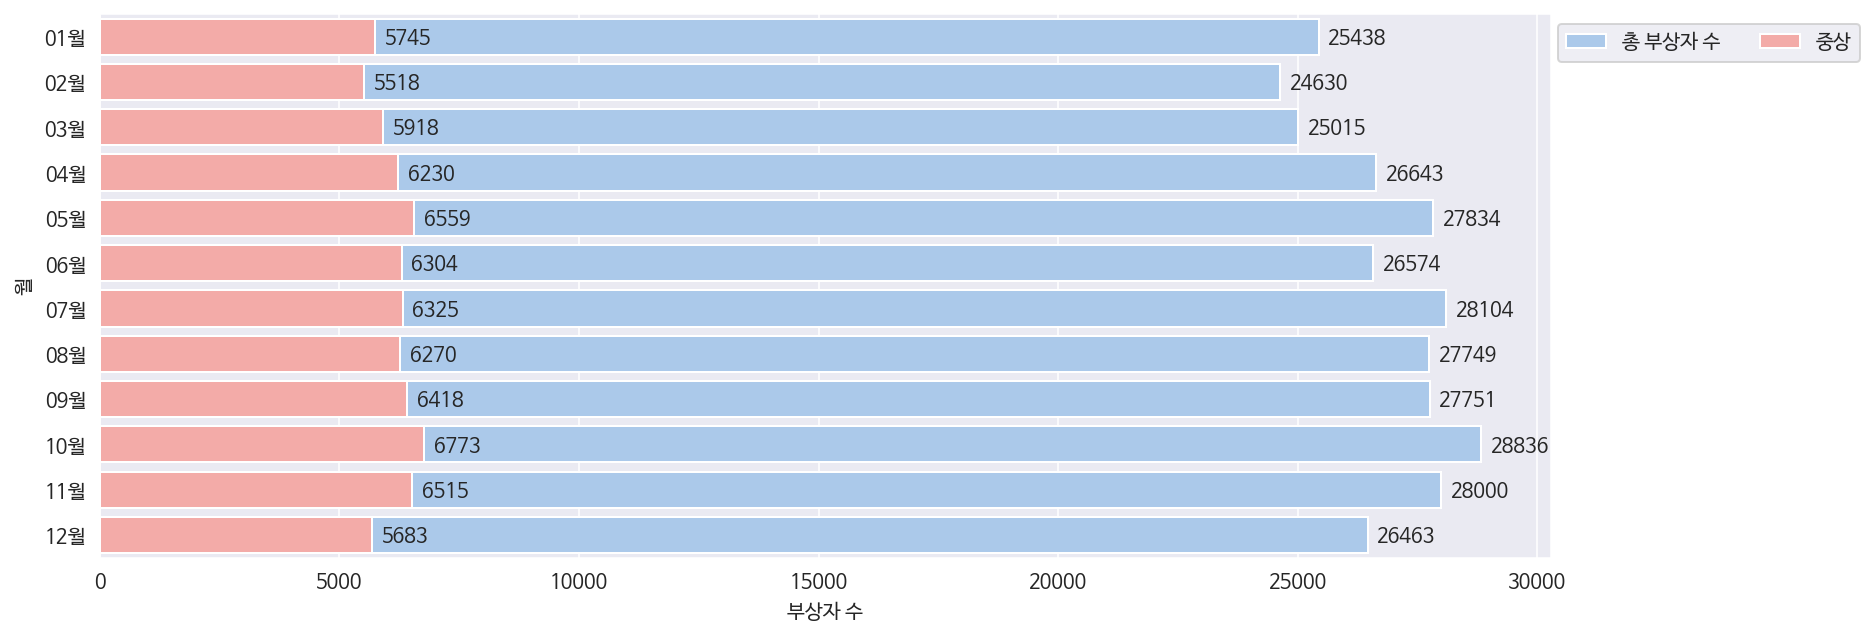

In [162]:
# Figure that shows total injured people and ones with serious injury
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x="부상자수", y="월", data=byMonth, label="총 부상자 수", color="b", ci=None, estimator=sum)
sns.barplot(x="중상", y="월", data=byMonth, label="중상", color="r", ci=None, estimator=sum)
ax.legend(ncol=2, loc="upper right", frameon=True, bbox_to_anchor=(1.22, 1))
ax.set(xlabel='부상자 수')
show_values_on_bars(ax, "h", 200, 0.25)

However, most people were hurt in September.